# Importing the required libraries

In [1]:
import pandas as pd
from nltk.corpus import stopwords
from nltk.stem.wordnet import WordNetLemmatizer
import string
from textblob.classifiers import NaiveBayesClassifier
from textblob import TextBlob
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from textblob import Word
from nltk.util import ngrams
import re
from nltk.tokenize import word_tokenize
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
from sklearn.decomposition import LatentDirichletAllocation
import sklearn.feature_extraction.text as text
from sklearn.decomposition import NMF, LatentDirichletAllocation, TruncatedSVD
from sklearn import model_selection, preprocessing, linear_model, naive_bayes, metrics, svm
import xgboost
from sklearn import decomposition, ensemble
import pandas, numpy, textblob, string
import re
import nltk
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_absolute_error


# Reading the file 

In [2]:
import pandas as pd
data = pd.read_csv('DATA.csv')##########################3
data.columns =['EMOTION', 'TEXT']
data.head()

,EMOTION,TEXT
0,fear,Every time I imagine that someone I love or I ...
1,anger,When I had been obviously unjustly treated and...
2,sadness,When I think about the short time that we live...
3,disgust,At a gathering I found myself involuntarily si...
4,shame,When I realized that I was directing the feeli...


# Text preprocessing

In [4]:
data['TEXT'] = data['TEXT'].apply(lambda a: " ".join(a.lower() for a in a.split()))
data['TEXT'] = data['TEXT'].apply(lambda a: " ".join(a.replace('[^\w\s]','') for a in a.split()))
stop = stopwords.words('english')
data['TEXT'] = data['TEXT'].apply(lambda a: " ".join(a for a in a.split() if a not in stop))
#data['TEXT'] = data['TEXT'].apply(lambda a: str(TextBlob(a).correct()))
st = PorterStemmer()
data['TEXT'] =  data['TEXT'].apply(lambda a: " ".join([st.stem(word) for word in a.split()]))


In [5]:
data.head()

,EMOTION,TEXT
0,fear,everi time imagin someon love could contact á ...
1,anger,obvious unjustli treat possibl á elucid this.
2,sadness,think short time live relat á period life thin...
3,disgust,gather found involuntarili sit next two á peop...
4,shame,realiz direct feel discont á partner way tri p...


In [6]:
data['EMOTION'].value_counts()

shame      1094
disgust    1094
sadness    1094
anger      1094
fear       1093
guilt      1091
joy        1091
Name: EMOTION, dtype: int64

# Encoding the target variable

In [7]:
object = preprocessing.LabelEncoder()
data['EMOTION'] = object.fit_transform(data['EMOTION'])


In [8]:
data['EMOTION'].value_counts()

0    1094
1    1094
5    1094
6    1094
2    1093
4    1091
3    1091
Name: EMOTION, dtype: int64

# Train-Test split

In [9]:
Xtrain, Xtest, Ytrain, Ytest = model_selection.train_test_split(data['TEXT'], data['EMOTION'],stratify= data['EMOTION'])  

# converting text to features using countvectorizer

In [10]:
cv = CountVectorizer()
cv.fit(data['TEXT'])
cv_xtrain =  cv.transform(Xtrain)
cv_xtest =  cv.transform(Xtest)



# Converting text to features using TF-IDF

In [11]:
tv = TfidfVectorizer()
tv.fit(data['TEXT'])
tv_xtrain =  tv.transform(Xtrain)
tv_xtest =  tv.transform(Xtest)


# Model build function

In [12]:
def build(model_initializer, independent_variables_training, target, independent_variable_test):#########################
    # fit 
        classifier_model=model_initializer.fit(independent_variables_training, target)###########################3
    # predict 
    modelPred=classifier_model.predict(independent_variable_test)
    return metrics.accuracy_score(modelPred, Ytest)


# NavieBayes model

In [13]:
# for CV
output = build(naive_bayes.MultinomialNB(), cv_xtrain, Ytrain, cv_xtest)
print(output)
# for TF-IDF
output = build(naive_bayes.MultinomialNB(), tv_xtrain, Ytrain, tv_xtest)
print(output)


0.5368531102979613
0.5373758494511239


# Logistic Regression model

In [14]:
# for CV
output = build(linear_model.LogisticRegression(), cv_xtrain, Ytrain, cv_xtest)
print(output)

# for TF-IDF
output = build(linear_model.LogisticRegression(), tv_xtrain, Ytrain, tv_xtest)
print(output)


/Users/akskulka/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.5405122843700993
0.5541035023523262


# SVM model

In [15]:
#for cv
output = build(svm.SVC(), cv_xtrain, Ytrain, cv_xtest)
print(output)

#for TF-IDF 
output = build(svm.SVC(), tv_xtrain, Ytrain, tv_xtest)##########################(),
print(output)


0.5133298484056456
0.553058024046001


# Random Forest model

In [16]:
#for CV
output = build(ensemble.RandomForestClassifier(), cv_xtrain, Ytrain, cv_xtest)
print(output)

#for TF-IDF 
output = build(ensemble.RandomForestClassifier(), tv_xtrain, Ytrain, tv_xtest)#############tv_xtest
print(output)


0.5196027182435965
0.5373758494511239


# Building Logistic Model using TF-IDF as features as the accuracy is better compared to other models

In [17]:
classifier = linear_model.LogisticRegression().fit(tv_xtrain, Ytrain)############3tv_xtrain
val_predictions = classifier.predict(tv_xtest)

# Precision , Recall , F1 - score , Support
y_true, y_pred = Ytest, val_predictions
print(classification_report(y_true, y_pred))
print()


              precision    recall  f1-score   support

           0       0.43      0.44      0.44       274
           1       0.54      0.60      0.57       273
           2       0.67      0.67      0.67       273
           3       0.46      0.42      0.44       273
           4       0.64      0.73      0.68       273
           5       0.62      0.53      0.57       273
           6       0.50      0.49      0.50       274

    accuracy                           0.55      1913
   macro avg       0.55      0.55      0.55      1913
weighted avg       0.55      0.55      0.55      1913




# Extracting the twitter data for the emotion predictions and sentiment

In [18]:
import tweepy
from tweepy import OAuthHandler
import json
import pandas as pd
import datetime as dt
import time
import os
import sys


'''
In order to use this script you should register a data-mining application
with Twitter.  Good instructions for doing so can be found here:
http://marcobonzanini.com/2015/03/02/mining-twitter-data-with-python-part-1/
After doing this you can copy and paste your unique consumer key,
consumer secret, access token, and access secret into the load_api()
function below.
The main() function can be run by executing the command: 
python twitter_search.py
I used Python 3 and tweepy version 3.5.0.  You will also need the other
packages imported above.
'''

def load_api():
    ''' Function that loads the twitter API after authorizing the user. '''

    consumer_key = 'c68ZDMTYHivwc4RETaj55ETxa'
    consumer_secret = 'Ng3qsFjwPzCjS69VKsN3VcgwVS3fpyej1zhgCdorkC2uMWZLVo'
    access_token = '1003856940642910209-gT4vaK9m1ReYbc5hW7tPG7qYY27AyW'
    access_token_secret = 'O60Kd73sg7CHyh3N8efzZvXthem5VpGlm0Sb79xSC54ym'
    auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
    auth.set_access_token(access_token, access_token_secret)
    # load the twitter API via tweepy
    return tweepy.API(auth)

    
def tweet_search(api, query, max_tweets, max_id, since_id, geocode):
    ''' Function that takes in a search string 'query', the maximum
        number of tweets 'max_tweets', and the minimum (i.e., starting)
        tweet id. It returns a list of tweepy.models.Status objects. '''

    searched_tweets = []
    while len(searched_tweets) < max_tweets:
        remaining_tweets = max_tweets - len(searched_tweets)
        try:
            new_tweets = api.search(q=query, count=remaining_tweets,
                                    since_id=str(since_id), max_id=str(max_id-1))
#                                    geocode=geocode)
            print('found',len(new_tweets),'tweets')
            if not new_tweets:
                print('no tweets found')
                break
            searched_tweets.extend(new_tweets)
            max_id = new_tweets[-1].id
        except tweepy.TweepError:
            print('exception raised, waiting 15 minutes')
            print('(until:', dt.datetime.now()+dt.timedelta(minutes=15), ')')
            time.sleep(15*60)
            break # stop the loop
    return searched_tweets, max_id


def get_tweet_id(api, date='', days_ago=9, query='a'):
    ''' Function that gets the ID of a tweet. This ID can then be
        used as a 'starting point' from which to search. The query is
        required and has been set to a commonly used word by default.
        The variable 'days_ago' has been initialized to the maximum
        amount we are able to search back in time (9).'''

    if date:
        # return an ID from the start of the given day
        td = date + dt.timedelta(days=1)
        tweet_date = '{0}-{1:0>2}-{2:0>2}'.format(td.year, td.month, td.day)
        tweet = api.search(q=query, count=1, until=tweet_date)
    else:
        # return an ID from __ days ago
        td = dt.datetime.now() - dt.timedelta(days=days_ago)
        tweet_date = '{0}-{1:0>2}-{2:0>2}'.format(td.year, td.month, td.day)
        # get list of up to 10 tweets
        tweet = api.search(q=query, count=10, until=tweet_date)
        print('search limit (start/stop):',tweet[0].created_at)
        # return the id of the first tweet in the list
        return tweet[0].id


def write_tweets(tweets, filename):
    ''' Function that appends tweets to a file. '''

    with open(filename, 'a') as f:
        for tweet in tweets:
            json.dump(tweet._json, f)
            f.write('\n')


def main():
    ''' This is a script that continuously searches for tweets
        that were created over a given number of days. The search
        dates and search phrase can be changed below. '''



    ''' search variables: '''
    search_phrases = ['samsung']
    
    
    
    time_limit = 1.5                           # runtime limit in hours
    max_tweets = 100                           # number of tweets per search (will be
                                               # iterated over) - maximum is 100
    min_days_old, max_days_old = 6, 7          # search limits e.g., from 7 to 8
                                               # gives current weekday from last week,
                                               # min_days_old=0 will search from right now
    USA = '39.8,-95.583068847656,2500km'       # this geocode includes nearly all American
                                               # states (and a large portion of Canada)
    

    # loop over search items,
    # creating a new file for each
    for search_phrase in search_phrases:

        print('Search phrase =', search_phrase)

        ''' other variables '''
        name = search_phrase.split()[0]
        json_file_root = name + '/'  + name
        os.makedirs(os.path.dirname(json_file_root), exist_ok=True)
        read_IDs = False
        
        # open a file in which to store the tweets
        if max_days_old - min_days_old == 1:
            d = dt.datetime.now() - dt.timedelta(days=min_days_old)
            day = '{0}-{1:0>2}-{2:0>2}'.format(d.year, d.month, d.day)
        else:
            d1 = dt.datetime.now() - dt.timedelta(days=max_days_old-1)
            d2 = dt.datetime.now() - dt.timedelta(days=min_days_old)
            day = '{0}-{1:0>2}-{2:0>2}_to_{3}-{4:0>2}-{5:0>2}'.format(
                  d1.year, d1.month, d1.day, d2.year, d2.month, d2.day)
        json_file = json_file_root + '_' + day + '.json'
        if os.path.isfile(json_file):
            print('Appending tweets to file named: ',json_file)
            read_IDs = True
        
        # authorize and load the twitter API
        api = load_api()
        
        # set the 'starting point' ID for tweet collection
        if read_IDs:
            # open the json file and get the latest tweet ID
            with open(json_file, 'r') as f:
                lines = f.readlines()
                max_id = json.loads(lines[-1])['id']
                print('Searching from the bottom ID in file')
        else:
            # get the ID of a tweet that is min_days_old
            if min_days_old == 0:
                max_id = -1
            else:
                max_id = get_tweet_id(api, days_ago=(min_days_old-1))
        # set the smallest ID to search for
        since_id = get_tweet_id(api, days_ago=(max_days_old-1))
        print('max id (starting point) =', max_id)
        print('since id (ending point) =', since_id)
        


        ''' tweet gathering loop  '''
        start = dt.datetime.now()
        end = start + dt.timedelta(hours=time_limit)
        count, exitcount = 0, 0
        while dt.datetime.now() < end:
            count += 1
            print('count =',count)
            # collect tweets and update max_id
            tweets, max_id = tweet_search(api, search_phrase, max_tweets,
                                          max_id=max_id, since_id=since_id,
                                          geocode=USA)
            
            # write tweets to file in JSON format
            if tweets:
                write_tweets(tweets, json_file)
                exitcount = 0
            else:
                exitcount += 1
                if exitcount == 3:
                    if search_phrase == search_phrases[-1]:
                        sys.exit('Maximum number of empty tweet strings reached - exiting')
                    else:
                        print('Maximum number of empty tweet strings reached - breaking')
                        break
                        
                        
                        


if __name__ == "__main__":
    main()

Search phrase = samsung
search limit (start/stop): 2021-11-05 23:59:59
search limit (start/stop): 2021-11-04 23:59:59
max id (starting point) = 1456773321316397063
since id (ending point) = 1456410933450973190
count = 1
found 100 tweets
count = 2
found 99 tweets
found 1 tweets
count = 3
found 100 tweets
count = 4
found 100 tweets
count = 5
found 100 tweets
count = 6
found 100 tweets
count = 7
found 100 tweets
count = 8
found 100 tweets
count = 9
found 100 tweets
count = 10
found 100 tweets
count = 11
found 100 tweets
count = 12
found 100 tweets
count = 13
found 100 tweets
count = 14
found 99 tweets
found 1 tweets
count = 15
found 99 tweets
found 1 tweets
count = 16
found 100 tweets
count = 17
found 100 tweets
count = 18
found 100 tweets
count = 19
found 100 tweets
count = 20
found 100 tweets
count = 21
found 100 tweets
count = 22
found 100 tweets
count = 23
found 100 tweets
count = 24
found 100 tweets
count = 25
found 100 tweets
count = 26
found 100 tweets
count = 27
found 100 tweets
c

found 100 tweets
count = 273
found 100 tweets
count = 274
found 100 tweets
count = 275
found 99 tweets
found 1 tweets
count = 276
found 100 tweets
count = 277
found 100 tweets
count = 278
found 100 tweets
count = 279
found 100 tweets
count = 280
found 100 tweets
count = 281
found 100 tweets
count = 282
found 100 tweets
count = 283
found 99 tweets
found 1 tweets
count = 284
found 100 tweets
count = 285
found 100 tweets
count = 286
found 100 tweets
count = 287
found 100 tweets
count = 288
found 100 tweets
count = 289
found 100 tweets
count = 290
found 100 tweets
count = 291
found 100 tweets
count = 292
found 100 tweets
count = 293
found 100 tweets
count = 294
found 100 tweets
count = 295
found 100 tweets
count = 296
found 100 tweets
count = 297
found 100 tweets
count = 298
found 100 tweets
count = 299
found 100 tweets
count = 300
found 100 tweets
count = 301
found 100 tweets
count = 302
found 100 tweets
count = 303
found 100 tweets
count = 304
found 100 tweets
count = 305
found 100 tweet

SystemExit: Maximum number of empty tweet strings reached - exiting

/Users/akskulka/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:2890: UserWarning: To exit: use 'exit', 'quit', or Ctrl-D.
  warn("To exit: use 'exit', 'quit', or Ctrl-D.", stacklevel=1)


# Reading the extracted twitter data

In [21]:
twt=pd.read_json('samsung/samsung_2021-11-05.json',lines=True,orient='records')

# Selecting the required columns

In [22]:
twt = twt[[ 'created_at','text']] 

# Text Preprocessing

In [24]:
 #text preprocess for twitter data
twt['text'] = twt['text'].str.lstrip('0123456789')
#lower casing
twt['text'] = twt['text'].apply(lambda a: " ".join(a.lower() for a in a.split()))
#remove punctuation
twt['text'] = twt['text'].str.replace('[^\w\s]','')
#remove stopwords
sw = stopwords.words('english')
twt['text'] = twt['text'].apply(lambda a: " ".join(a for a in a.split() if a not in sw))
#spelling correction
#twt['text'].apply(lambda a: str(TextBlob(a).correct()))


/Users/akskulka/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: FutureWarning: The default value of regex will change from True to False in a future version.
  


In [26]:
twt.tail()###########df-twt

,created_at,text
39418,2021-11-05 00:00:04+00:00,kabum tablet samsung galaxy a7 lite 4g 32gb an...
39419,2021-11-05 00:00:03+00:00,rt kirstingives 100 4600 1400000 idr samsung g...
39420,2021-11-05 00:00:02+00:00,tanyarl halou samsung user mau nanya dong ini ...
39421,2021-11-05 00:00:01+00:00,samsung quickstar samsung good lock se actuali...
39422,2021-11-05 00:00:00+00:00,to5toys last call amazon halo band 75 hisense ...


# Convert to features and predict the emotions using the trained model

In [28]:
Xpredict =  twt['text']
    
# word level tf-idf
predict_tfidf =  tv.transform(Xpredict)#########tfidf-tvv
    
# Get  Predicted Emotion
twt['Emotion'] = classifier.predict(predict_tfidf)

twt.tail()


,created_at,text,Emotion
39418,2021-11-05 00:00:04+00:00,kabum tablet samsung galaxy a7 lite 4g 32gb an...,6
39419,2021-11-05 00:00:03+00:00,rt kirstingives 100 4600 1400000 idr samsung g...,2
39420,2021-11-05 00:00:02+00:00,tanyarl halou samsung user mau nanya dong ini ...,1
39421,2021-11-05 00:00:01+00:00,samsung quickstar samsung good lock se actuali...,4
39422,2021-11-05 00:00:00+00:00,to5toys last call amazon halo band 75 hisense ...,0


# Predicting the sentiment using pre-trained model

In [31]:
twt['sentiment'] = twt['text'].apply(lambda a: TextBlob(a).sentiment[0] )
    
        
def function (value):
    if value['sentiment'] < 0:#######indeennt
        return 'Negative'
    if value['sentiment'] > 0:
        return 'Positive'
    return 'Neutral'
twt['Sentiment_label'] = twt.apply (lambda a: function(a),axis=1)

# Visualizations

In [43]:
twt.tail()

,created_at,text,Emotion,sentiment,Sentiment_label
39418,2021-11-05 00:00:04+00:00,kabum tablet samsung galaxy a7 lite 4g 32gb an...,6,0.0,Neutral
39419,2021-11-05 00:00:03+00:00,rt kirstingives 100 4600 1400000 idr samsung g...,2,0.0,Neutral
39420,2021-11-05 00:00:02+00:00,tanyarl halou samsung user mau nanya dong ini ...,1,0.0,Neutral
39421,2021-11-05 00:00:01+00:00,samsung quickstar samsung good lock se actuali...,4,0.7,Positive
39422,2021-11-05 00:00:00+00:00,to5toys last call amazon halo band 75 hisense ...,0,0.0,Neutral


In [38]:
import chart_studio.plotly as py
import plotly as ply
import cufflinks as cf
from plotly.graph_objs import *
from plotly.offline import *

init_notebook_mode(connected=True)
cf.set_config_file(offline=True, world_readable=True, theme='white')

Sentiment_df = pd.DataFrame(twt.Sentiment_label.value_counts().reset_index())#####df-twt
Sentiment_df.columns = ['Sentiment', 'Count']
    
Sentiment_df = pd.DataFrame(Sentiment_df)

Sentiment_df['Percentage'] = 100 * Sentiment_df['Count']/ Sentiment_df['Count'].sum()
    
Sentiment_Max = Sentiment_df.iloc[0,0]
Sentiment_percent = str(round(Sentiment_df.iloc[0,2],2))
    
    
fig1 = Sentiment_df.iplot(kind='pie',labels='Sentiment',values='Count',textinfo='label+percent', title= 'Sentiment Analysis', world_readable=True,
                    asFigure=True)
        
ply.offline.plot(fig1,filename="Sentiment")


/Users/akskulka/anaconda3/lib/python3.7/site-packages/plotly/offline/offline.py:563: UserWarning:

Your filename `Sentiment` didn't end with .html. Adding .html to the end of your file.



'Sentiment.html'

In [40]:
import chart_studio.plotly as py
import plotly as ply
import cufflinks as cf
from plotly.graph_objs import *
from plotly.offline import *

init_notebook_mode(connected=True)
cf.set_config_file(offline=True, world_readable=True, theme='white')
Emotion_df = pd.DataFrame(twt.Emotion.value_counts().reset_index())####df-twt
Emotion_df.columns = ['Emotion', 'Count']
Emotion_df = pd.DataFrame (Emotion_df)
Emotion_df['Percentage'] = 100 * Emotion_df['Count']/ Emotion_df['Count'].sum()

Emotion_Max = Emotion_df.iloc[0,0]
Emotion_percent = str(round(Emotion_df.iloc[0,2],2))
fig = Emotion_df.iplot(kind='pie', labels = 'Emotion', values = 'Count',pull= .2, hole=.2 , colorscale = 'reds', textposition='outside',colors=['red','green','purple','orange','blue','yellow','pink'],textinfo='label+percent', title= 'Emotion Analysis', world_readable=True,asFigure=True)
ply.offline.plot(fig,filename="Emotion")

/Users/akskulka/anaconda3/lib/python3.7/site-packages/plotly/offline/offline.py:563: UserWarning:

Your filename `Emotion` didn't end with .html. Adding .html to the end of your file.



'Emotion.html'

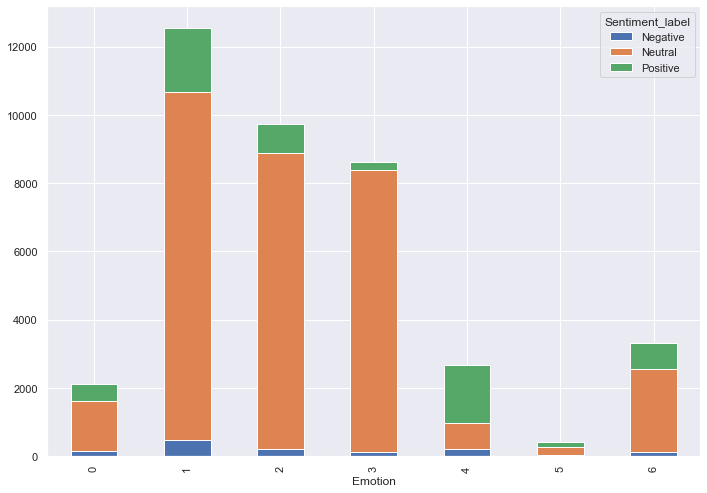

In [44]:
import seaborn as sns
sns.set(rc={'figure.figsize':(11.7,8.27)})
    
Result = pd.crosstab(twt.Emotion, twt.Sentiment_label)
plt = Result.plot.bar(stacked=True,sort_columns = True)
plt.legend(title='Sentiment_label')
plt.figure.savefig('Emotion_Sentiment_stacked.png', dpi=400)


# Email generation code 

In [ ]:
from email.mime.text import MIMEText
from email.mime.multipart import MIMEMultipart
import os

from email.mime.application import MIMEApplication
from email import encoders
import smtplib


def generate_email():
    
    dir_path = "Add PATH"
    files = ["Add files"]
    
    # Add concerned address (you can add multiple address also) and Password
    company_dict = ['xyz@gmail.com']
    password = "Password"
    
    for value in company_dict:
        # Add From email address
        From_address = 'From email id'
        To_address = value

        text = MIMEMultipart()

        text['From'] = "xxxx"
        text['To'] = To_address
        text['Subject'] = "Emotion Detection and Sentiment Analysis Report"

        body = " Hai \n Greetings of the day,\n We would like to inform you that the data is more about, \n Emotion -  "+Emotion_Max+" ("+Emotion_percent+" %).\n Sentiment - " +Sentiment_Max+" ("+Sentiment_percent+" %).\n\n For the details please go through the attachments bellow. \n\n\n\n\n Thank You."

        text.attach(MIMEText(body, 'plain'))


        for k in files:  # add files to the message
        
            file_location = os.path.join(dir_location, k)
            attachment = MIMEApplication(open(file_location, "rb").read(), _subtype="txt")
            attachment.add_header('Content-Disposition',obj, filename=k)
            text.attach(attachment)

        smtp = smtplib.SMTP_SSL('smtp.gmail.com', 465)
        smtp.login(From_address, password)
        text1 = text.as_string()
        smtp.sendmail(From_address, To_address, text1)
        smtp.quit()
        
        return 'Successfully Sent..!'


#Calling the function to send reports
          
generate_email ()
